# Initial Analysis

In this notebook I will explore the dataset, but leave any classifications to other notebooks or for a later date.

In [1]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [3]:
df = pd.read_csv('OnionOrNot.csv')
df

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1
...,...,...
23995,Teen Pregnancy Rate Prompting More High School...,1
23996,Connecticut TV station under fire after using ...,0
23997,Jurisprudence Fetishist Gets Off On Technicality,1
23998,Employees From Other Department Announce Plan ...,1


In [11]:
# See if our class distributions are equal
# We have a fairly even distribution which is nice.
df['label'].value_counts(), df['label'].value_counts(normalize=True)

(0    15000
 1     9000
 Name: label, dtype: int64,
 0    0.625
 1    0.375
 Name: label, dtype: float64)

In [31]:
# Create simple feature of number of words in a title, just to get a feel of the data and to start plotting

# this goes through the text column and splits their text to a list with spaces as a delimiter. Then counts the length to give us number of words.
df['NumOfWords'] = df.text.apply(lambda x: len(x.split()))
df

,text,label,NumOfWords
0,Entire Facebook Staff Laughs As Man Tightens P...,1,9
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14
2,Bold Move: Hulu Has Announced That They’re Gon...,1,23
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1,19
4,"For men looking for great single women, online...",1,23
...,...,...,...
23995,Teen Pregnancy Rate Prompting More High School...,1,14
23996,Connecticut TV station under fire after using ...,0,15
23997,Jurisprudence Fetishist Gets Off On Technicality,1,6
23998,Employees From Other Department Announce Plan ...,1,17


In [50]:
# Split dataframe into onion only and not onion only
dfOnion = df.loc[df['label'] == 1]
dfNotOnion = df.loc[df['label'] == 0]
dfNotOnion

,text,label,NumOfWords
1,Muslim Woman Denied Soda Can for Fear She Coul...,0,14
6,"Omaha dad finds pot brownies, eats 4 of them, ...",0,14
7,"Pokémon Go player stabbed, keeps playing",0,6
11,"Woman's rejected ""8theist"" license plate viola...",0,8
12,Man Tries to Rob a Bank After Paying $500 to a...,0,16
...,...,...,...
23989,UKIP candidate Alex Wood suspended over 'Nazi ...,0,16
23990,Man Who Is Apparently Unimpressed By 3D Caught...,0,15
23993,"There’s an emu on the loose in North Carolina,...",0,17
23996,Connecticut TV station under fire after using ...,0,15


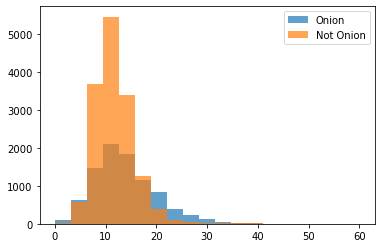

In [65]:
# Histogram of number of words
#  Looks like not onion articles are much more likely to have a title length of around 10 while if the length is above 20 then its probably an onion headline.

bins = np.linspace(0, 60, 20) # Manually set bins so that we can share them between out histograms

plt.hist(dfOnion['NumOfWords'], bins=bins, alpha=0.7, label='Onion')
plt.hist(dfNotOnion['NumOfWords'], bins=bins, alpha=0.7, label='Not Onion')
plt.legend()


In [78]:
# Initial attempt classifier of a Naive Bayes
#  Just to get a baseline of what a simple model can do
#  Has an accuracy of 68%, better than I was expecting for such a simple model

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X = df['NumOfWords'].to_numpy().reshape(-1, 1)
y = df['label'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

# train model
clfNB = GaussianNB().fit(X_train, y_train)
y_pred = clfNB.predict(X_test)

print( classification_report(y_test, y_pred, target_names=['Not Onion', 'Onion']) )
print( accuracy_score(y_test, y_pred) )

              precision    recall  f1-score   support

   Not Onion       0.67      0.94      0.78     10539
       Onion       0.70      0.23      0.34      6261

    accuracy                           0.68     16800
   macro avg       0.69      0.58      0.56     16800
weighted avg       0.68      0.68      0.62     16800

0.6755357142857142
